In [1]:
from __future__ import division

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
# libraries
#%matplotlib notebook

import pandas as pd
import numpy as np

import matplotlib
import seaborn
import matplotlib.dates as md
from matplotlib import pyplot as plt

In [3]:
# load the master_dataset.xls
df = pd.read_excel('master_dataset.xlsx', sheetname='Sheet1')

In [4]:
# Use MarkDown1 sales as a target for prediction. 
df_MarkDown1 = df['MarkDown1']

In [5]:
def MarkDown1_Split(x):
    if x < 4444:
        return 0
    elif 4444< x < 8888:
        return 1
    elif 8888< x < 13332:
        return 2
    elif 13332 < x < 17776:
        return 3
    else: return 4

In [6]:
# Descritize MarkDown_Score
df_MarkDown1["MarkDown_Score"] = df_MarkDown1.apply(MarkDown1_Split)

C:\Users\Angus\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [7]:
print (df_MarkDown1["MarkDown_Score"].head())

0    2
1    2
2    2
3    2
4    2
Name: MarkDown1, dtype: int64


In [8]:
#Drop none-float columns and the MarkDowns that would be used for prediction
df.drop(['Store', 'Date', 'IsHoliday', 'Type', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], axis=1, inplace=True)

In [9]:
X = df[['Temperature', 'CPI']]

In [10]:
X.shape

(8190, 2)

In [11]:
X=X.as_matrix(columns=X.columns[1:])

In [12]:
y = df_MarkDown1["MarkDown_Score"]

In [13]:
y.shape

(8190,)

In [14]:
acc_clf1, acc_clf2 = [], []

In [15]:
score_clf1, score_clf2 = 0, 0

In [16]:
 clf1 = LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto').fit(X, y)

In [17]:
 clf2 = LinearDiscriminantAnalysis(solver='lsqr', shrinkage=None).fit(X, y)

In [18]:
score_clf1 += clf1.score(X, y)

In [19]:
score_clf2 += clf2.score(X, y)

In [20]:
n_train = 8190  # samples for training
n_test = 8190  # samples for testing
n_averages = 50  # how often to repeat classification
n_features_max = 75  # maximum number of features
step = 4  # step size for the calculation

In [21]:
n_features_range = range(1, n_features_max + 1, step)

In [22]:
 acc_clf1.append(score_clf1 / n_averages)

In [23]:
acc_clf2.append(score_clf2 / n_averages)

In [24]:
features_samples_ratio = np.array(n_features_range) / n_train

In [26]:
acc_clf1

[0.0074188034188034189]

In [28]:
clf1

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage='auto',
              solver='lsqr', store_covariance=False, tol=0.0001)

In [27]:
features_samples_ratio

array([ 0.0001221 ,  0.0006105 ,  0.0010989 ,  0.0015873 ,  0.0020757 ,
        0.0025641 ,  0.0030525 ,  0.0035409 ,  0.0040293 ,  0.0045177 ,
        0.00500611,  0.00549451,  0.00598291,  0.00647131,  0.00695971,
        0.00744811,  0.00793651,  0.00842491,  0.00891331])

In [25]:
plt.plot(features_samples_ratio, acc_clf1, linewidth=2,
         label="Linear Discriminant Analysis with shrinkage", color='navy')
plt.plot(features_samples_ratio, acc_clf2, linewidth=2,
         label="Linear Discriminant Analysis", color='gold')

plt.xlabel('n_features / n_samples')
plt.ylabel('Classification accuracy')

plt.legend(loc=1, prop={'size': 12})
plt.suptitle('Linear Discriminant Analysis vs. \
shrinkage Linear Discriminant Analysis (1 discriminative feature)')
plt.show()

ValueError: x and y must have same first dimension, but have shapes (19,) and (1,)

In [53]:
def generate_data(n_samples, n_features):
    X, y = make_blobs(n_samples=n_samples, n_features=1, centers=[[-2], [2]])
    if n_features > 1:
        X = np.hstack([X, np.random.randn(n_samples, n_features - 1)])
        return X, y

In [54]:
X

array([[ 211.0963582],
       [ 211.2421698],
       [ 211.2891429],
       ..., 
       [ 193.589304 ],
       [ 193.589304 ],
       [ 193.589304 ]])

In [55]:
X.shape

(8190, 1)

In [64]:
y = df_MarkDown1["MarkDown_Score"]

In [65]:
X1 = df[['Temperature']]

In [66]:
X1=X1.values

In [67]:
X1

array([[ 42.31],
       [ 38.51],
       [ 39.93],
       ..., 
       [ 79.37],
       [ 82.84],
       [ 76.06]])

In [68]:
n_train = 4190  # samples for training
n_test = 4000  # samples for testing
n_averages = 50  # how often to repeat classification
n_features_max = 75  # maximum number of features
step = 4  # step size for the calculation

In [69]:
acc_clf1, acc_clf2 = [], []
n_features_range = range(1, n_features_max + 1, step)
for n_features in n_features_range:
    score_clf1, score_clf2 = 0, 0
    for _ in range(n_averages):
        X1, y = generate_data(n_train, n_features)

In [70]:
y

array([1, 1, 1, ..., 1, 1, 0])

In [71]:
y.shape

(4190,)

In [72]:
X1

array([[ 1.39886101,  0.88980935, -0.39786948, ..., -0.59416112,
        -1.70786803,  0.19089023],
       [ 1.25475005,  0.75990723, -1.02408295, ...,  0.63401587,
        -0.92620537, -0.59338988],
       [ 0.12242565, -0.50391419, -0.67413398, ..., -1.09771885,
         0.37968951,  0.38298264],
       ..., 
       [ 0.05201398,  0.1157446 ,  1.15960177, ..., -0.64261215,
         1.06223153, -0.1178728 ],
       [ 2.75351999,  0.79504901,  1.93020054, ..., -2.02882069,
         0.52938951, -0.03025996],
       [-3.31807337, -1.47709659, -0.86019686, ...,  1.28464689,
        -0.85214614,  1.28849458]])

In [73]:
X1.shape

(4190, 73)

In [76]:
clf1 = LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto').fit(X1, y)
clf2 = LinearDiscriminantAnalysis(solver='lsqr', shrinkage=None).fit(X1, y)

In [86]:
clf1

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage='auto',
              solver='lsqr', store_covariance=False, tol=0.0001)

In [78]:
X1, y = generate_data(n_test, n_features)
score_clf1 += clf1.score(X1, y)
score_clf2 += clf2.score(X1, y)


In [87]:
score_clf1

0.97899999999999998

In [79]:
acc_clf1.append(score_clf1 / n_averages)
acc_clf2.append(score_clf2 / n_averages)

In [85]:
acc_clf1

[0.01958]

In [83]:
features_samples_ratio = np.array(n_features_range) / n_train
features_samples_ratio

array([ 0.00023866,  0.00119332,  0.00214797,  0.00310263,  0.00405728,
        0.00501193,  0.00596659,  0.00692124,  0.00787589,  0.00883055,
        0.0097852 ,  0.01073986,  0.01169451,  0.01264916,  0.01360382,
        0.01455847,  0.01551313,  0.01646778,  0.01742243])

C:\Users\Angus\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


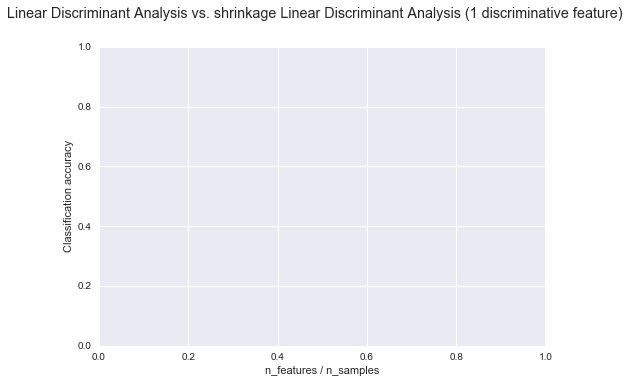

In [84]:
#plt.plot(features_samples_ratio, acc_clf1, linewidth=2,
#         label="Linear Discriminant Analysis with shrinkage", color='navy')
#plt.plot(features_samples_ratio, acc_clf2, linewidth=2,
#         label="Linear Discriminant Analysis", color='gold')

plt.xlabel('n_features / n_samples')
plt.ylabel('Classification accuracy')

plt.legend(loc=1, prop={'size': 12})
plt.suptitle('Linear Discriminant Analysis vs. \
shrinkage Linear Discriminant Analysis (1 discriminative feature)')
plt.show()